# Part 1
## 2 Nerons

In [1]:
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt

SEED = 10010
DEVICE = torch.set_default_device('cpu')

In [2]:
gen = torch.Generator()

T = 20

x = torch.zeros(100)
x[40:60] = 0.25

N = 2 


In [3]:
y_hat_uncoup = torch.zeros((100,2))
trials_uncoup = torch.zeros((100,100,2))

for i in range(100):
    gen.manual_seed(12345+i*12)
    y = torch.tensor([np.zeros(100)]*2).T
    for t in range(1,100):
        T_t = min(T,t)
        h = torch.tensor([[[-0.1,0],
                           [0,-0.1]]]*T_t,dtype=torch.float64)
        y_T = y[t-T_t:t,:]
        x_t = x[t-T_t:t]

        sum_h_y = torch.zeros(2)
        for i in range(N):
            h_t = h[:,i,:]
            sum_h_y[i] = sum_h_y[i]+(y_T*h_t).sum()

        lam = 0.2*torch.exp(x_t.sum()+sum_h_y)
        y[t]= torch.poisson(lam, generator=gen)
    y_hat_uncoup = y_hat_uncoup+y
y_hat_uncoup=y_hat_uncoup/100


/Users/mxwaldo/.pyenv/versions/copGP/lib/python3.11/site-packages/torch/utils/_device.py:77: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:264.)
  return func(*args, **kwargs)


In [4]:
y_hat_coup = torch.zeros((100,2))
trials = torch.zeros((100,100,2))

for i in range(100):
    gen.manual_seed(12345+i*12)
    y = torch.zeros((100,2),dtype=float)
    for t in range(1,100):
        T_t = min(T,t)
        h = torch.tensor([[[-0.1, 0.4*((t_p/T_t)**2)],
                           [-0.1*((1-t_p/T_t)**2), -0.1]] for t_p in range(T_t)], dtype=float)
        y_T = y[t-T_t:t,:]
        x_t = x[t-T_t:t]

        sum_h_y = torch.zeros(2)
        for i in range(N):
            h_t = h[:,i,:]
            sum_h_y[i] = sum_h_y[i]+(y_T*h_t).sum()

        lam = 0.2*torch.exp(x_t.sum()+sum_h_y)
        y[t]= torch.poisson(lam, generator=gen)
    y_hat_coup = y_hat_coup+y
    trials[i]=y

y_hat_coup=y_hat_coup/100

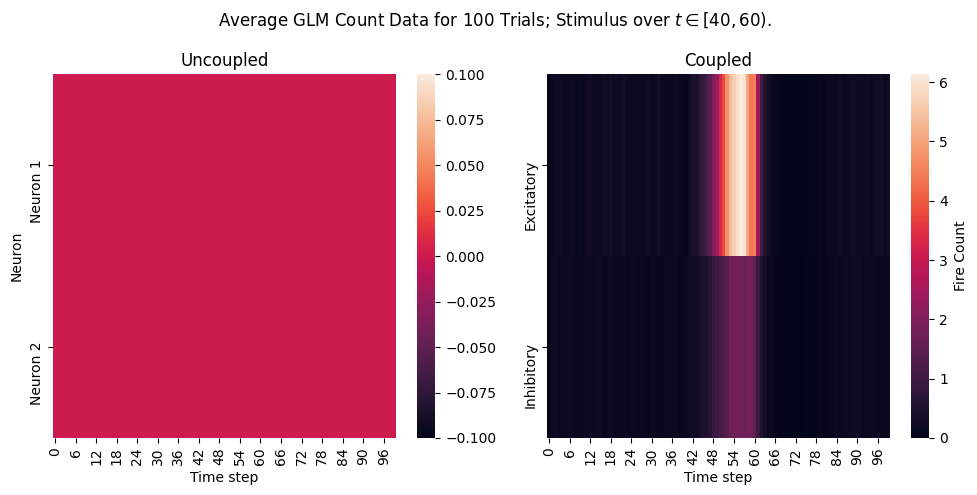

In [12]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10, 5))

fig.suptitle('Average GLM Count Data for 100 Trials; Stimulus over $t \in [40,60)$.')

sns.heatmap(trials[0].T,ax=ax1)
ax1.set_ylabel('Neuron')
ax1.set_xlabel('Time step')
ax1.set_title('Uncoupled')
ax1.set_yticks([0.5, 1.5],labels=['Neuron 1','Neuron 2'])

sns.heatmap(y_hat_coup.T,ax=ax2,cbar_kws={'label':'Fire Count'})
ax2.set_xlabel('Time step')
ax2.set_title('Coupled')
ax2.set_yticks([0.5, 1.5],labels=['Excitatory','Inhibitory'])

plt.tight_layout()
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/COPGP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/COPGP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/COPGP/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/COPGP/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning

<Axes: >

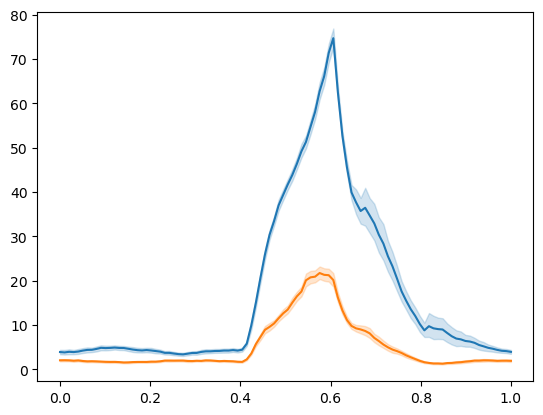

In [16]:
import pickle as pkl
with open("started/GLM_generated_data.pkl","rb") as f:
    data = pkl.load(f)
Ys = data['Y']
sns.lineplot(x=data['X'],y=Ys[0])
sns.lineplot(x=data['X'],y=Ys[1])

In [ ]:
plots = plt.subplots(2,2,figsize=(10, 10))

: 

/opt/homebrew/Caskroom/miniconda/base/envs/COPGP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/COPGP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/COPGP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/COPGP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

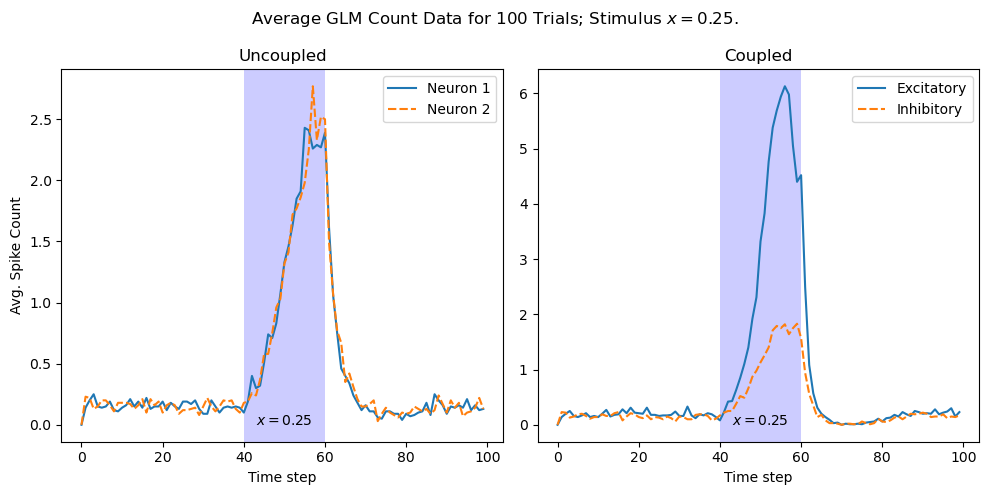

In [18]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10, 5))

fig.suptitle('Average GLM Count Data for 100 Trials; Stimulus $x = 0.25$.')

sns.lineplot({'Neuron 1': y_hat_uncoup[:,0], 'Neuron 2': y_hat_uncoup[:,1]},ax=ax1)
ax1.set_ylabel('Avg. Spike Count')
ax1.set_xlabel('Time step')
ax1.set_title('Uncoupled')

sns.lineplot({'Excitatory': y_hat_coup[:,0], 'Inhibitory': y_hat_coup[:,1]},ax=ax2)
ax2.set_xlabel('Time step')
ax2.set_title('Coupled')

ax1.axvspan(40, 60, color='b', alpha=0.2, lw=0)
ax2.axvspan(40, 60, color='b', alpha=0.2, lw=0)

ax1.annotate('$x=0.25$',(43,.0))
ax2.annotate('$x=0.25$',(43,.0))

plt.tight_layout()
plt.show()

Conversion from Time-Binned to spikes. ()

# GPFA

In [19]:
import elephant.gpfa as gpfa

In [20]:

latent_dimensionality = 1

gpfa_1dim = gpfa.GPFA(x_dim=latent_dimensionality)

In [21]:
gpfa_1dim.fit(trials)

ValueError: structure of the spiketrains is not correct: 0-axis should be trials, 1-axis neo.SpikeTrainand 2-axis spike times